# Reflections

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `PrepareIdentity`
An identity PrepareOracle.

This is helpful for creating a reflection about zero and as a signal state for block encodings.

#### Parameters
 - `selection_regs`: The selection registers for state prepareation. These are the incilla the state will be prepared over. 

#### Registers
 - `selection_registers`: The selection registers.


In [2]:
from qualtran.bloqs.reflections.prepare_identity import PrepareIdentity

### Example Instances

In [3]:
prepare_identity = PrepareIdentity.from_bitsizes((10, 4, 1))

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([prepare_identity],
           ['`prepare_identity`'])

### Call Graph

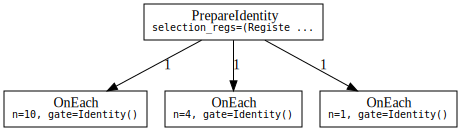

#### Counts totals:
 - `I⨂10`: 1
 - `I⨂1`: 1
 - `I⨂4`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
prepare_identity_g, prepare_identity_sigma = prepare_identity.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(prepare_identity_g)
show_counts_sigma(prepare_identity_sigma)

## `ReflectionUsingPrepare`
Applies reflection around a state prepared by `prepare_gate`

Applies $R_{s, g=1} = g (I - 2|s\rangle\langle s|)$ using $R_{s} =
P(I - 2|0\rangle\langle0|)P^{\dagger}$ s.t. $P|0\rangle = |s\rangle$.

Here:
- $|s\rangle$: The state along which we want to reflect.
- $P$: Unitary that prepares that state $|s\rangle $ from the zero state $|0\rangle$
- $R_{s}$: Reflection operator that adds a `-1` phase to all states in the subspace
    spanned by $|s\rangle$.
- $g$: The global phase to control the behavior of the reflection. For example:
    We often use $g=-1$ in literature to denote the reflection operator as
    $R_{s} = -1 (I - 2|s\rangle\langle s|) = 2|s\rangle\langle s| - I$

The composite gate corresponds to implementing the following circuit:

```
|control> ------------------ Z -------------------
                             |
|L>       ---- PREPARE^† --- o --- PREPARE -------
```


#### Parameters
 - `prepare_gate`: An implementation of `PREPARE` for state preparation.
 - `control_val`: If 0/1, a controlled version of the reflection operator is constructed. Defaults to None, in which case the resulting reflection operator is not controlled.
 - `global_phase`: The global phase to apply in front of the reflection operator. When building a controlled reflection operator, the global phase translates into a relative phase.
 - `eps`: precision for implementation of rotation. Only relevant if global_phase is arbitrary angle and gate is not controlled. 

#### References
 - [Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity](https://arxiv.org/abs/1805.03662).     Babbush et. al. (2018). Figure 1.


In [6]:
from qualtran.bloqs.reflections.reflection_using_prepare import ReflectionUsingPrepare

### Example Instances

In [7]:
from qualtran.bloqs.state_preparation import StatePreparationAliasSampling

data = [1] * 5
eps = 1e-2
prepare_gate = StatePreparationAliasSampling.from_lcu_probs(data, probability_epsilon=eps)

refl_using_prep = ReflectionUsingPrepare(prepare_gate)

In [8]:
refl_around_zero = ReflectionUsingPrepare.reflection_around_zero(
    bitsizes=(1, 2, 3), global_phase=-1, control_val=1
)

#### Graphical Signature

In [9]:
from qualtran.drawing import show_bloqs
show_bloqs([refl_using_prep, refl_around_zero],
           ['`refl_using_prep`', '`refl_around_zero`'])

### Call Graph

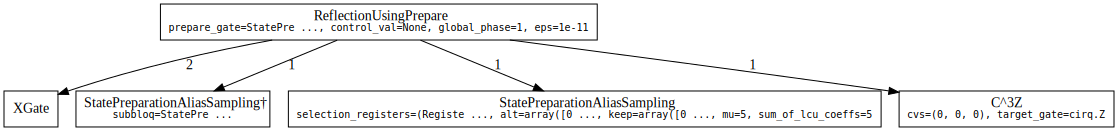

#### Counts totals:
 - `Adjoint(subbloq=StatePreparationAliasSampling)`: 1
 - `MultiControlPauli`: 1
 - `StatePreparationAliasSampling`: 1
 - `XGate`: 2

In [10]:
from qualtran.resource_counting.generalizers import ignore_split_join
refl_using_prep_g, refl_using_prep_sigma = refl_using_prep.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(refl_using_prep_g)
show_counts_sigma(refl_using_prep_sigma)